# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combdata = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combdata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pymean = combdata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
pymed = combdata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
pyvar = combdata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
pystd = combdata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
pysem = combdata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
py_df = pd.DataFrame({"Mean Tumor Volume":pymean,
                      "Median Tumor Volume":pymed,
                      "Tumor Volume Variance":pyvar,
                      "Tumor Volume Std. Dev.":pystd,
                      "Tumor Volume Std. Err.":pysem
                     })
py_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

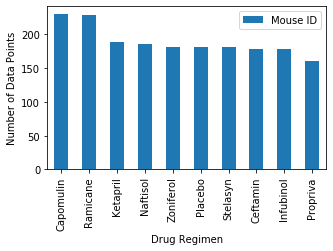

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints_pandas = pd.DataFrame(combdata.groupby("Drug Regimen").count())
datapoints_pandas = datapoints_pandas[["Mouse ID"]]
datapoints_pandas = datapoints_pandas.sort_values(by="Mouse ID",ascending=False)
datapoints_pandas.plot(kind="bar", figsize=(5,3))
plt.ylabel("Number of Data Points")
plt.show()
plt.tight_layout()

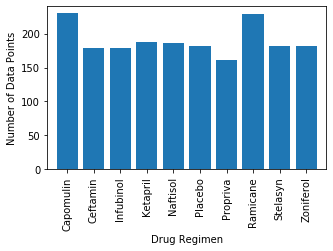

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
datapoints_pyplot = combdata.groupby(["Drug Regimen"])
count_pyplot = datapoints_pyplot[["Mouse ID"]].count()
count_pyplot = count_pyplot.reset_index()
plt.figure(figsize=(5,3))
plt.bar(count_pyplot["Drug Regimen"], count_pyplot["Mouse ID"], align="center")
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(count_pyplot["Drug Regimen"])-0.25)
plt.ylim(0, max(count_pyplot["Mouse ID"])+10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

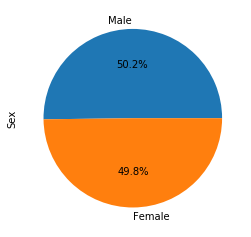

In [5]:
# Generate a pie plot showing the /distribution of female versus male mice using pandas
gender = combdata.groupby("Sex")
count = gender['Mouse ID'].nunique()
gender_df = pd.DataFrame({"Sex": [125, 124]}, index=["Male", "Female"])
pie_pandas = gender_df.plot.pie(y="Sex", autopct="%1.1f%%", figsize=(4, 8), legend=None)

Text(0.5, 1.0, 'Sex')

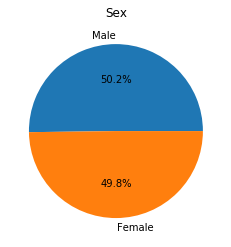

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [125, 124]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title('Sex')

## Quartiles, Outliers and Boxplots

In [7]:
# Calculate the final tumor volume of each mouse.
ftv = combdata.groupby(["Mouse ID"]).max()
ftv = ftv.reset_index()
ftv_df = ["Mouse ID", "Timepoint"]
merge = ftv[ftv_df].merge(combdata, on=ftv_df, how="left")
merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [8]:
# Calculate the final tumor volume of each mouse in Capomulin treatment regime. 
cap = merge.loc[merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capquartiles = round(cap.quantile([.25,.5,.75]),2)
caplowerq = round(capquartiles[0.25],2)
capupperq = round(capquartiles[0.75],2)
capiqr = round(capupperq-caplowerq,2)

print(f"The lower quartile of occupancy is: {caplowerq}")
print(f"The upper quartile of occupancy is: {capupperq}")
print(f"The interquartile range of occupancy is: {capiqr}")
print(f"The the median of occupancy is: {capquartiles[0.5]} ")

caplower_bound = caplowerq - (1.5*capiqr)
capupper_bound = capupperq + (1.5*capiqr)
print(f"Values below {caplower_bound} could be outliers.")
print(f"Values above {capupper_bound} could be outliers.")
print(f"Capomulin potential outliers: {cap.loc[(cap < caplower_bound) | (cap > capupper_bound)]}")

The lower quartile of occupancy is: 32.38
The upper quartile of occupancy is: 40.16
The interquartile range of occupancy is: 7.78
The the median of occupancy is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [9]:
# Calculate the final tumor volume of each mouse in Ramicane treatment regime.
ram = merge.loc[merge["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramquartiles = round(ram.quantile([.25,.5,.75]),2)
ramlowerq = round(ramquartiles[0.25],2)
ramupperq = round(ramquartiles[0.75],2)
ramiqr = round(ramupperq-ramlowerq,2)

print(f"The lower quartile of occupancy is: {ramlowerq}")
print(f"The upper quartile of occupancy is: {ramupperq}")
print(f"The interquartile range of occupancy is: {ramiqr}")
print(f"The the median of occupancy is: {ramquartiles[0.5]} ")

ramlower_bound = ramlowerq - (1.5*ramiqr)
ramupper_bound = round(ramupperq + (1.5*ramiqr),2)
print(f"Values below {ramlower_bound} could be outliers.")
print(f"Values above {ramupper_bound} could be outliers.")
print(f"Ramicane potential outliers: {ram.loc[(ram < ramlower_bound) | (ram > ramupper_bound)]}")

The lower quartile of occupancy is: 31.56
The upper quartile of occupancy is: 40.66
The interquartile range of occupancy is: 9.1
The the median of occupancy is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [10]:
# Calculate the final tumor volume of each mouse in Infubinol treatment regime. 
inf = merge.loc[merge["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infquartiles = round(inf.quantile([.25,.5,.75]),2)
inflowerq = round(infquartiles[0.25],2)
infupperq = round(infquartiles[0.75],2)
infiqr = round(infupperq-inflowerq,2)

print(f"The lower quartile of occupancy is: {inflowerq}")
print(f"The upper quartile of occupancy is: {infupperq}")
print(f"The interquartile range of occupancy is: {infiqr}")
print(f"The the median of occupancy is: {infquartiles[0.5]} ")

inflower_bound = inflowerq - (1.5*infiqr)
infupper_bound = infupperq + (1.5*infiqr)
print(f"Values below {inflower_bound} could be outliers.")
print(f"Values above {infupper_bound} could be outliers.")
print(f"Infubinol potential outliers: {inf.loc[(inf < inflower_bound) | (inf > infupper_bound)]}")

The lower quartile of occupancy is: 54.05
The upper quartile of occupancy is: 65.53
The interquartile range of occupancy is: 11.48
The the median of occupancy is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [11]:
# Calculate the final tumor volume of each mouse in Ceftamin treatment regime. 
cef = merge.loc[merge["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cefquartiles = round(cef.quantile([.25,.5,.75]),2)
ceflowerq = round(cefquartiles[0.25],2)
cefupperq = round(cefquartiles[0.75],2)
cefiqr = round(cefupperq-ceflowerq,2)

print(f"The lower quartile of occupancy is: {ceflowerq}")
print(f"The upper quartile of occupancy is: {cefupperq}")
print(f"The interquartile range of occupancy is: {cefiqr}")
print(f"The the median of occupancy is: {cefquartiles[0.5]} ")

ceflower_bound = round(ceflowerq - (1.5*cefiqr),2)
cefupper_bound = cefupperq + (1.5*cefiqr)
print(f"Values below {ceflower_bound} could be outliers.")
print(f"Values above {cefupper_bound} could be outliers.")
print(f"Ceftamin potential outliers: {cef.loc[(cef < ceflower_bound) | (cef > cefupper_bound)]}")

The lower quartile of occupancy is: 48.72
The upper quartile of occupancy is: 64.3
The interquartile range of occupancy is: 15.58
The the median of occupancy is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


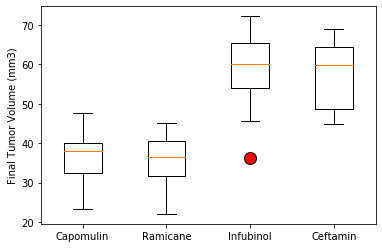

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([cap,ram,inf,cef],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

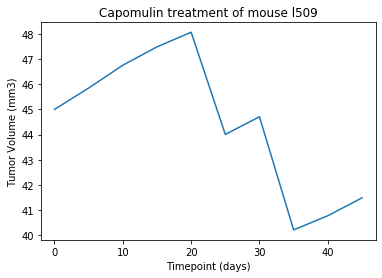

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse1509 = combdata.loc[combdata["Mouse ID"] == "l509"]
time1509 = mouse1509.set_index("Timepoint")
time1509["Tumor Volume (mm3)"].plot()
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-2, 47)
plt.show()

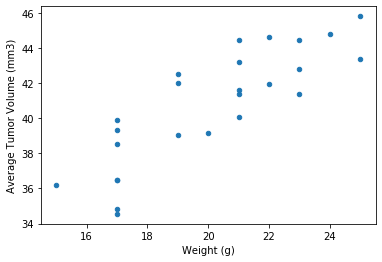

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
loc_cap = combdata.loc[combdata["Drug Regimen"] == "Capomulin"]
mouse_weight = loc_cap.groupby(["Mouse ID", "Weight (g)"])
mouse_weight = mouse_weight[["Tumor Volume (mm3)"]].mean()
mouse_weight = mouse_weight.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
x="Weight (g)"
y="Average Tumor Volume (mm3)"
capscat = mouse_weight.reset_index()
capscat.plot.scatter(x, y)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
